In [1]:
from glob import glob
from os.path import splitext,join
from glob import glob

from numpy import *
import numpy as np
from numpy.random import rand
from scipy.stats import linregress
from numpy.linalg import norm

import MDAnalysis
import MDAnalysis.analysis.hbonds
import MDAnalysis.analysis.distances

from matplotlib.pyplot import *
from matplotlib.cm import *
%matplotlib inline

(1, 20)

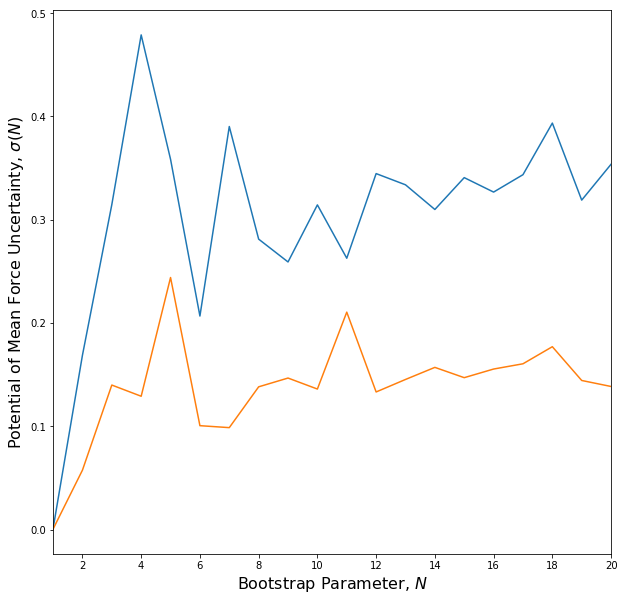

In [43]:
f = figure(figsize=(10,10))
dY = []
dZ = []

for n in range(1,21) :
    _,_,dy = genfromtxt('./umbrella-sampling-data/hairpin1_pulling_umbrella/bsResult{'+str(n).zfill(1)+'}.xvg',dtype=float,skip_header=13).T
    _,_,dz = genfromtxt('./umbrella-sampling-data/helix1_pulling_umbrella/bsResult{'+str(n).zfill(1)+'}.xvg',dtype=float,skip_header=13).T


    dz = mean(dz)
    dy = mean(dy)
    
    dY += [dy]
    dZ += [dz]

plot(range(1,21),dY)
plot(range(1,21),dZ)

xlabel(r'Bootstrap Parameter, $N$',fontsize=16)
ylabel(r'Potential of Mean Force Uncertainty, $\sigma(N)$',fontsize=16);

ax = f.gca()
#...
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
xlim(1,20)

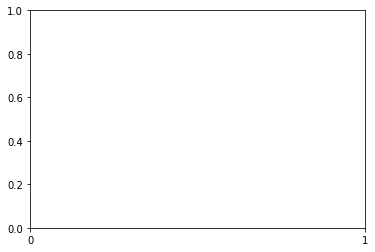

In [35]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
#...
